In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

---
## 서울특별시 공공자전거 대여소별 이용정보(시간대별)
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2020.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2021.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2022.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2023.parquet
- 서울특별시 공공자전거 대여소별 이용정보(시간대별)_2024.parquet

In [4]:
filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여소별 이용정보(시간대별)\\'
start_time = time.time()
df_parquet_2022 = pd.read_parquet(filepath + '서울특별시 공공자전거 대여소별 이용정보(시간대별)_2022.parquet')
df_parquet_2023 = pd.read_parquet(filepath + '서울특별시 공공자전거 대여소별 이용정보(시간대별)_2023.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 22.544206857681274


In [ ]:
# df_parquet_2022['대여구분코드'] = df_parquet_2022['대여구분코드'].astype('category')
# df_parquet_2022['성별'] = df_parquet_2022['성별'].astype('category')
# df_parquet_2022['연령대코드'] = df_parquet_2022['연령대코드'].astype('category')
# df_parquet_2022['요일'] = df_parquet_2022['요일'].astype('category')
# df_parquet_2022['대여소명'] = df_parquet_2022['대여소명'].astype('category')
# df_parquet_2022['대여시간'] = df_parquet_2022['대여시간'].astype('int32')
# df_parquet_2022['대여소번호'] = df_parquet_2022['대여소번호'].astype('int32')
# df_parquet_2022['이용건수'] = df_parquet_2022['이용건수'].astype('int32')
# df_parquet_2022['이용시간(분)'] = df_parquet_2022['이용시간(분)'].astype('int32')
# df_parquet_2022['운동량'] = df_parquet_2022['운동량'].astype('float32')
# df_parquet_2022['탄소량'] = df_parquet_2022['탄소량'].astype('float32')
# df_parquet_2022['이동거리(M)'] = df_parquet_2022['이동거리(M)'].astype('float32')
# df_parquet_2022.info()

In [6]:
df_parquet_2023.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2023-01-01,0,433,433. 을지로입구역 2번출구,정기권,None,~10대,1.0,44.24,0.42,1831.45,8.0
1,2023-01-01,0,2032,2032. 이수역 11번출구쪽,정기권,None,~10대,1.0,7.11,0.06,276.06,4.0
2,2023-01-01,0,744,744. 신목동역 2번 출구,정기권,None,20대,1.0,25.05,0.24,1020.46,7.0


In [8]:
# 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

In [10]:
df_parquet_2022['대여일자'] = pd.to_datetime(df_parquet_2022['대여일자'], format='%Y-%m-%d')
df_parquet_2022['요일_인덱스'] = df_parquet_2022['대여일자'].dt.weekday
# apply 함수로 숫자 -> 요일 이름으로 변환
df_parquet_2022['요일'] = df_parquet_2022.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

In [12]:
df_parquet_2023['대여일자'] = pd.to_datetime(df_parquet_2023['대여일자'], format='%Y-%m-%d')
df_parquet_2023['요일_인덱스'] = df_parquet_2023['대여일자'].dt.weekday
# apply 함수로 숫자 -> 요일 이름으로 변환
df_parquet_2023['요일'] = df_parquet_2023.apply(lambda x : weekday_list[x['요일_인덱스']], axis=1)

In [14]:
print(df_parquet_2022.shape)
print(df_parquet_2023.shape)

(36160476, 14)
(39993697, 14)


In [16]:
print(df_parquet_2022.info())
print(df_parquet_2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160476 entries, 0 to 36160475
Data columns (total 14 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별       object        
 6   연령대코드    object        
 7   이용건수     int64         
 8   운동량      float64       
 9   탄소량      float64       
 10  이동거리(M)  float64       
 11  이용시간(분)  int64         
 12  요일_인덱스   int32         
 13  요일       object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(5)
memory usage: 3.6+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39993697 entries, 0 to 39993696
Data columns (total 14 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일자     datetime64[ns]
 1   대여시간     int64         
 2   대여소번호    int64         
 3   대여소명     object        
 4   대여구분코드   object        
 5   성별

In [18]:
df_parquet_2022.head(5)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일_인덱스,요일
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,None,~10대,1,13.54,0.13,570.00,3,3,목
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,None,~10대,1,32.81,0.36,1534.33,12,3,목
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,None,~10대,1,19.10,0.17,720.00,4,3,목
3,2022-12-01,0,1355,1355. 보문2교,정기권,None,~10대,1,10.57,0.08,333.59,3,3,목
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,None,~10대,1,6.93,0.07,318.20,37,3,목


In [20]:
ee.ss_isnull(df_parquet_2023)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여일자,39993697,0,0.000000
1,대여시간,39993697,0,0.000000
2,대여소번호,39993697,0,0.000000
3,대여소명,39993697,0,0.000000
4,대여구분코드,39993697,0,0.000000
5,성별,27853187,12140510,30.356058
6,연령대코드,39993697,0,0.000000
7,이용건수,39993697,0,0.000000
8,운동량,39848716,144981,0.362510
9,탄소량,39848716,144981,0.362510


ee.ss_value_counts(df_parquet_2022)

### 출퇴근시간, 평일 데이터조회

In [22]:
cond1 = df_parquet_2022['대여시간'].isin([7, 8, 9, 17, 18, 19])
cond2 = df_parquet_2022['요일'].isin(['월', '화', '수', '목', '금'])
df_parquet_2022 = df_parquet_2022[cond1 & cond2]

In [24]:
cond1 = df_parquet_2023['대여시간'].isin([7, 8, 9, 17, 18, 19])
cond2 = df_parquet_2023['요일'].isin(['월', '화', '수', '목', '금'])
df_parquet_2023 = df_parquet_2023[cond1 & cond2]

In [26]:
start_time = time.time()
df_parquet_2022_grp = df_parquet_2022.groupby('대여소번호')['이용건수'].sum().reset_index()
df_parquet_2023_grp = df_parquet_2023.groupby('대여소번호')['이용건수'].sum().reset_index()
print("groupby time :", time.time() - start_time)
df_parquet_2022_grp.head()

groupby time : 0.5653934478759766


,대여소번호,이용건수
0,3,85
1,5,25
2,102,12871
3,103,8324
4,104,6077


In [28]:
df_parquet_2022_grp.rename(columns = {'이용건수':'이용건수_2022'}, inplace = True)
df_parquet_2023_grp.rename(columns = {'이용건수':'이용건수_2023'}, inplace = True)

In [30]:
df_parquet_2022_grp = df_parquet_2022_grp.astype({'대여소번호':'str'})
df_parquet_2023_grp = df_parquet_2023_grp.astype({'대여소번호':'str'})

In [32]:
print(df_parquet_2022_grp.info())
print(df_parquet_2023_grp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소번호      2764 non-null   object
 1   이용건수_2022  2764 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2788 non-null   object 
 1   이용건수_2023  2788 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.7+ KB
None


In [34]:
df_parquet_2022_grp['대여소번호']  = df_parquet_2022_grp['대여소번호'].str.zfill(width=5)
df_parquet_2023_grp['대여소번호']  = df_parquet_2023_grp['대여소번호'].str.zfill(width=5)

In [36]:
df_parquet_2022_grp.head(1)

,대여소번호,이용건수_2022
0,00003,85


In [38]:
df_parquet_2023_grp.head(1)

,대여소번호,이용건수_2023
0,00011,5.0


In [40]:
df_parquet_2022_2023 = pd.merge(df_parquet_2022_grp, df_parquet_2023_grp, how='left', left_on='대여소번호', right_on='대여소번호')
df_parquet_2022_2023.head()

,대여소번호,이용건수_2022,이용건수_2023
0,00003,85,NaN
1,00005,25,NaN
2,00102,12871,12269.0
3,00103,8324,9374.0
4,00104,6077,6696.0


In [42]:
df_parquet_2022_2023['이용건수(2023-2022)'] = df_parquet_2022_2023['이용건수_2023'] - df_parquet_2022_2023['이용건수_2022']
df_parquet_2022_2023.head()

,대여소번호,이용건수_2022,이용건수_2023,이용건수(2023-2022)
0,00003,85,NaN,NaN
1,00005,25,NaN,NaN
2,00102,12871,12269.0,-602.0
3,00103,8324,9374.0,1050.0
4,00104,6077,6696.0,619.0


In [44]:
df_parquet_2022_2023.shape

(2764, 4)

---
## 대여소 정보

In [47]:
filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울시 공공자전거 대여소 정보\\'
filename = '공공자전거 대여소 정보_통합본.parquet'
start_time = time.time()
df_bikerental = pd.read_parquet(filepath + filename)
print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.1138296127319336


In [49]:
df_bikerental = df_bikerental[['대여소번호', '대여소명', '자치구']]
df_bikerental.head()

,대여소번호,대여소명,자치구
20852,06173,서울자동차운전전문학원,강서구
19007,02902,공릉풍림아파트 108동,노원구
19015,02912,대진고등학교,노원구
19014,02911,상계역중앙시장,노원구
19013,02910,도깨비시장,노원구


In [51]:
df_parquet_2022_2023 = pd.merge(df_parquet_2022_2023, df_bikerental, on = '대여소번호', how = 'left')

In [53]:
df_parquet_2022_2023.head()

,대여소번호,이용건수_2022,이용건수_2023,이용건수(2023-2022),대여소명,자치구
0,00003,85,NaN,NaN,NaN,NaN
1,00005,25,NaN,NaN,NaN,NaN
2,00102,12871,12269.0,-602.0,망원역 1번출구 앞,마포구
3,00103,8324,9374.0,1050.0,망원역 2번출구 앞,마포구
4,00104,6077,6696.0,619.0,합정역 1번출구 앞,마포구


In [55]:
ee.ss_isnull(df_parquet_2022_2023)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,대여소번호,2764,0,0.000000
1,이용건수_2022,2764,0,0.000000
2,이용건수_2023,2701,63,2.279305
3,이용건수(2023-2022),2701,63,2.279305
4,대여소명,2750,14,0.506512
5,자치구,2750,14,0.506512


In [57]:
df_parquet_2022_2023 = df_parquet_2022_2023.groupby('자치구')[['이용건수_2022', '이용건수_2023', '이용건수(2023-2022)']].sum().reset_index()
df_parquet_2022_2023.sort_values(by = '이용건수(2023-2022)', ascending = False)

,자치구,이용건수_2022,이용건수_2023,이용건수(2023-2022)
3,강서구,1723621,2005451.0,302338.0
19,영등포구,1224639,1347474.0,150400.0
17,송파구,1240462,1317614.0,115420.0
8,노원구,672005,769970.0,106881.0
6,구로구,579939,680977.0,101038.0
18,양천구,769051,860485.0,94533.0
15,성동구,556849,635404.0,82921.0
0,강남구,412255,494196.0,81941.0
5,광진구,619556,692185.0,73903.0
22,종로구,486823,546235.0,62625.0


---
### 자치구 별 자전거도로

In [60]:
start_time = time.time()
df_parquet = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울시 자전거 이용시설 통계\\' + '_자전거 통계_2019_2023' + '_pivot' +  '.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.0255129337310791


In [62]:
df_parquet.head(5)

,자치구,총계 연장(㎞)_2018,총계 연장(㎞)_2019,총계 연장(㎞)_2020,총계 연장(㎞)_2021,총계 연장(㎞)_2022,총계 연장(㎞)_2023,총계 노선(개)_2018,총계 노선(개)_2019,총계 노선(개)_2020,...,겸용도로(비분리형) 연장(㎞)_2020,겸용도로(비분리형) 연장(㎞)_2021,겸용도로(비분리형) 연장(㎞)_2022,겸용도로(비분리형) 연장(㎞)_2023,겸용도로(비분리형) 노선(개)_2018,겸용도로(비분리형) 노선(개)_2019,겸용도로(비분리형) 노선(개)_2020,겸용도로(비분리형) 노선(개)_2021,겸용도로(비분리형) 노선(개)_2022,겸용도로(비분리형) 노선(개)_2023
0,강남구,52.6,52.6,89.96,98.55,110.49,113.39,27,26,65,...,31.71,40.76,47.88,48.58,12,11,29,32,39,40
1,강동구,40.8,42.1,71.98,74.11,74.44,76.62,33,33,66,...,39.21,41.07,41.07,42.90,11,11,27,39,39,42
2,강북구,7.0,7.0,8.70,8.70,8.70,8.70,3,3,8,...,2.97,2.97,2.97,2.97,1,1,2,2,2,2
3,강서구,27.9,41.7,76.38,68.31,77.06,77.34,34,43,80,...,24.41,14.70,14.70,14.70,8,7,14,11,11,11
4,관악구,19.5,19.5,29.50,27.73,27.73,27.73,15,15,19,...,19.60,17.80,17.80,17.80,5,4,7,7,7,7


In [64]:
df_parquet_temp = df_parquet

In [66]:
df_parquet_temp['총계 연장(㎞)(2023-2022)'] = df_parquet_temp['총계 연장(㎞)_2023'] - df_parquet_temp['총계 연장(㎞)_2022']
df_parquet_temp[['자치구', '총계 연장(㎞)(2023-2022)']].sort_values(by = '총계 연장(㎞)(2023-2022)', ascending = False).head(10)

,자치구,총계 연장(㎞)(2023-2022)
6,구로구,5.07
14,서초구,3.17
0,강남구,2.90
17,송파구,2.23
1,강동구,2.18
15,성동구,1.35
19,영등포구,1.05
5,광진구,1.00
13,서대문구,0.67
10,동대문구,0.62


In [68]:
df_parquet_temp.head()

,자치구,총계 연장(㎞)_2018,총계 연장(㎞)_2019,총계 연장(㎞)_2020,총계 연장(㎞)_2021,총계 연장(㎞)_2022,총계 연장(㎞)_2023,총계 노선(개)_2018,총계 노선(개)_2019,총계 노선(개)_2020,...,겸용도로(비분리형) 연장(㎞)_2021,겸용도로(비분리형) 연장(㎞)_2022,겸용도로(비분리형) 연장(㎞)_2023,겸용도로(비분리형) 노선(개)_2018,겸용도로(비분리형) 노선(개)_2019,겸용도로(비분리형) 노선(개)_2020,겸용도로(비분리형) 노선(개)_2021,겸용도로(비분리형) 노선(개)_2022,겸용도로(비분리형) 노선(개)_2023,총계 연장(㎞)(2023-2022)
0,강남구,52.6,52.6,89.96,98.55,110.49,113.39,27,26,65,...,40.76,47.88,48.58,12,11,29,32,39,40,2.90
1,강동구,40.8,42.1,71.98,74.11,74.44,76.62,33,33,66,...,41.07,41.07,42.90,11,11,27,39,39,42,2.18
2,강북구,7.0,7.0,8.70,8.70,8.70,8.70,3,3,8,...,2.97,2.97,2.97,1,1,2,2,2,2,0.00
3,강서구,27.9,41.7,76.38,68.31,77.06,77.34,34,43,80,...,14.70,14.70,14.70,8,7,14,11,11,11,0.28
4,관악구,19.5,19.5,29.50,27.73,27.73,27.73,15,15,19,...,17.80,17.80,17.80,5,4,7,7,7,7,0.00


In [70]:
columns = ['자치구',
           '총계 연장(㎞)_2023', '전용도로 연장(㎞)_2023', '전용차로 연장(㎞)_2023', '우선도로 연장(㎞)_2023', '겸용도로(분리형) 연장(㎞)_2023', '겸용도로(비분리형) 연장(㎞)_2023',
           '총계 노선(개)_2023', '전용도로 노선(개)_2023', '전용차로 노선(개)_2023', '우선도로 노선(개)_2023', '겸용도로(분리형) 노선(개)_2023', '겸용도로(비분리형) 노선(개)_2023'
         , '총계 연장(㎞)_2022', '전용도로 연장(㎞)_2022', '전용차로 연장(㎞)_2022', '우선도로 연장(㎞)_2022', '겸용도로(분리형) 연장(㎞)_2022', '겸용도로(비분리형) 연장(㎞)_2022',
           '총계 노선(개)_2022', '전용도로 노선(개)_2022', '전용차로 노선(개)_2022', '우선도로 노선(개)_2022', '겸용도로(분리형) 노선(개)_2022', '겸용도로(비분리형) 노선(개)_2022'
          ]
df_bikeload_2022_2023 = df_parquet[columns]

In [72]:
df_bikeload_2022_2023.sort_values(by = '총계 연장(㎞)_2023', ascending = False).head()

,자치구,총계 연장(㎞)_2023,전용도로 연장(㎞)_2023,전용차로 연장(㎞)_2023,우선도로 연장(㎞)_2023,겸용도로(분리형) 연장(㎞)_2023,겸용도로(비분리형) 연장(㎞)_2023,총계 노선(개)_2023,전용도로 노선(개)_2023,전용차로 노선(개)_2023,...,전용차로 연장(㎞)_2022,우선도로 연장(㎞)_2022,겸용도로(분리형) 연장(㎞)_2022,겸용도로(비분리형) 연장(㎞)_2022,총계 노선(개)_2022,전용도로 노선(개)_2022,전용차로 노선(개)_2022,우선도로 노선(개)_2022,겸용도로(분리형) 노선(개)_2022,겸용도로(비분리형) 노선(개)_2022
0,강남구,113.39,8.80,3.00,0.00,53.01,48.58,117,11,4,...,3.00,0.00,50.81,47.88,112,11,4,0,58,39
17,송파구,99.72,21.04,1.79,0.00,63.62,13.27,193,48,2,...,1.79,0.00,63.18,13.06,187,44,2,0,110,31
3,강서구,77.34,32.17,0.00,4.60,25.87,14.70,86,36,0,...,0.00,4.60,25.59,14.70,85,36,0,2,36,11
1,강동구,76.62,17.59,0.60,0.00,15.53,42.90,99,19,1,...,0.60,0.00,15.30,41.07,94,18,1,0,36,39
12,마포구,67.40,6.20,7.40,39.64,12.02,2.14,63,7,12,...,7.40,39.64,12.02,2.14,63,7,12,30,10,4


In [74]:
list(df_bikeload_2022_2023.columns)

['자치구',
 '총계 연장(㎞)_2023',
 '전용도로 연장(㎞)_2023',
 '전용차로 연장(㎞)_2023',
 '우선도로 연장(㎞)_2023',
 '겸용도로(분리형) 연장(㎞)_2023',
 '겸용도로(비분리형) 연장(㎞)_2023',
 '총계 노선(개)_2023',
 '전용도로 노선(개)_2023',
 '전용차로 노선(개)_2023',
 '우선도로 노선(개)_2023',
 '겸용도로(분리형) 노선(개)_2023',
 '겸용도로(비분리형) 노선(개)_2023',
 '총계 연장(㎞)_2022',
 '전용도로 연장(㎞)_2022',
 '전용차로 연장(㎞)_2022',
 '우선도로 연장(㎞)_2022',
 '겸용도로(분리형) 연장(㎞)_2022',
 '겸용도로(비분리형) 연장(㎞)_2022',
 '총계 노선(개)_2022',
 '전용도로 노선(개)_2022',
 '전용차로 노선(개)_2022',
 '우선도로 노선(개)_2022',
 '겸용도로(분리형) 노선(개)_2022',
 '겸용도로(비분리형) 노선(개)_2022']

In [76]:
df_bikeload_2022_2023['총계 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['총계 연장(㎞)_2023'] - df_bikeload_2022_2023['총계 연장(㎞)_2022']
df_bikeload_2022_2023['전용도로 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['전용도로 연장(㎞)_2023'] - df_bikeload_2022_2023['전용도로 연장(㎞)_2022']
df_bikeload_2022_2023['전용차로 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['전용차로 연장(㎞)_2023'] - df_bikeload_2022_2023['전용차로 연장(㎞)_2022']
df_bikeload_2022_2023['우선도로 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['우선도로 연장(㎞)_2023'] - df_bikeload_2022_2023['우선도로 연장(㎞)_2022']
df_bikeload_2022_2023['겸용도로(분리형) 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['겸용도로(분리형) 연장(㎞)_2023'] - df_bikeload_2022_2023['겸용도로(분리형) 연장(㎞)_2022']
df_bikeload_2022_2023['겸용도로(비분리형) 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['겸용도로(비분리형) 연장(㎞)_2023'] - df_bikeload_2022_2023['겸용도로(비분리형) 연장(㎞)_2022']
df_bikeload_2022_2023['총계 노선(개)_2023-2022'] = df_bikeload_2022_2023['총계 노선(개)_2023'] - df_bikeload_2022_2023['총계 노선(개)_2022']
df_bikeload_2022_2023['전용도로 노선(개)_2023-2022'] = df_bikeload_2022_2023['전용도로 노선(개)_2023'] - df_bikeload_2022_2023['전용도로 노선(개)_2022']
df_bikeload_2022_2023['전용차로 노선(개)_2023-2022'] = df_bikeload_2022_2023['전용차로 노선(개)_2023'] - df_bikeload_2022_2023['전용차로 노선(개)_2022']
df_bikeload_2022_2023['우선도로 노선(개)_2023-2022'] = df_bikeload_2022_2023['우선도로 노선(개)_2023'] - df_bikeload_2022_2023['우선도로 노선(개)_2022']
df_bikeload_2022_2023['겸용도로(분리형) 노선(개)_2023-2022'] = df_bikeload_2022_2023['겸용도로(분리형) 노선(개)_2023'] - df_bikeload_2022_2023['겸용도로(분리형) 노선(개)_2022']

C:\Users\user\AppData\Local\Temp\ipykernel_10064\308459516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikeload_2022_2023['총계 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['총계 연장(㎞)_2023'] - df_bikeload_2022_2023['총계 연장(㎞)_2022']
C:\Users\user\AppData\Local\Temp\ipykernel_10064\308459516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikeload_2022_2023['전용도로 연장(㎞)_2023-2022'] = df_bikeload_2022_2023['전용도로 연장(㎞)_2023'] - df_bikeload_2022_2023['전용도로 연장(㎞)_2022']
C:\Users\user\AppData\Local\Temp

In [78]:
df_bikeload_2022_2023.head(3)

,자치구,총계 연장(㎞)_2023,전용도로 연장(㎞)_2023,전용차로 연장(㎞)_2023,우선도로 연장(㎞)_2023,겸용도로(분리형) 연장(㎞)_2023,겸용도로(비분리형) 연장(㎞)_2023,총계 노선(개)_2023,전용도로 노선(개)_2023,전용차로 노선(개)_2023,...,전용도로 연장(㎞)_2023-2022,전용차로 연장(㎞)_2023-2022,우선도로 연장(㎞)_2023-2022,겸용도로(분리형) 연장(㎞)_2023-2022,겸용도로(비분리형) 연장(㎞)_2023-2022,총계 노선(개)_2023-2022,전용도로 노선(개)_2023-2022,전용차로 노선(개)_2023-2022,우선도로 노선(개)_2023-2022,겸용도로(분리형) 노선(개)_2023-2022
0,강남구,113.39,8.80,3.00,0.0,53.01,48.58,117,11,4,...,0.00,0.0,0.0,2.20,0.70,5,0,0,0,4
1,강동구,76.62,17.59,0.60,0.0,15.53,42.90,99,19,1,...,0.12,0.0,0.0,0.23,1.83,5,1,0,0,1
2,강북구,8.70,0.00,5.46,0.0,0.27,2.97,8,0,5,...,0.00,0.0,0.0,0.00,0.00,0,0,0,0,0


In [80]:
df_final = pd.merge(df_parquet_2022_2023, df_bikeload_2022_2023, how = 'left', on = '자치구')
df_final.head()

,자치구,이용건수_2022,이용건수_2023,이용건수(2023-2022),총계 연장(㎞)_2023,전용도로 연장(㎞)_2023,전용차로 연장(㎞)_2023,우선도로 연장(㎞)_2023,겸용도로(분리형) 연장(㎞)_2023,겸용도로(비분리형) 연장(㎞)_2023,...,전용도로 연장(㎞)_2023-2022,전용차로 연장(㎞)_2023-2022,우선도로 연장(㎞)_2023-2022,겸용도로(분리형) 연장(㎞)_2023-2022,겸용도로(비분리형) 연장(㎞)_2023-2022,총계 노선(개)_2023-2022,전용도로 노선(개)_2023-2022,전용차로 노선(개)_2023-2022,우선도로 노선(개)_2023-2022,겸용도로(분리형) 노선(개)_2023-2022
0,강남구,412255,494196.0,81941.0,113.39,8.80,3.00,0.00,53.01,48.58,...,0.00,0.0,0.0,2.20,0.70,5,0,0,0,4
1,강동구,565203,609650.0,50488.0,76.62,17.59,0.60,0.00,15.53,42.90,...,0.12,0.0,0.0,0.23,1.83,5,1,0,0,1
2,강북구,162644,179722.0,17712.0,8.70,0.00,5.46,0.00,0.27,2.97,...,0.00,0.0,0.0,0.00,0.00,0,0,0,0,0
3,강서구,1723621,2005451.0,302338.0,77.34,32.17,0.00,4.60,25.87,14.70,...,0.00,0.0,0.0,0.28,0.00,1,0,0,0,1
4,관악구,313736,319317.0,12287.0,27.73,4.70,0.00,3.43,1.80,17.80,...,0.00,0.0,0.0,0.00,0.00,0,0,0,0,0


In [ ]:
# df_final2 = df_final[['자치구', '이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2023', '전용도로 연장(㎞)_2023', '전용차로 연장(㎞)_2023', '우선도로 연장(㎞)_2023', '겸용도로(분리형) 연장(㎞)_2023', '겸용도로(비분리형) 연장(㎞)_2023']]
# df_final3 = df_final[['이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '전용도로 연장(㎞)_2023', '전용차로 연장(㎞)_2023', '우선도로 연장(㎞)_2023', '겸용도로(분리형) 연장(㎞)_2023', '겸용도로(비분리형) 연장(㎞)_2023']]

In [ ]:
list(df_final.columns)

['자치구',
 '이용건수_2022',
 '이용건수_2023',
 '이용건수(2023-2022)',
 '총계 연장(㎞)_2023',
 '전용도로 연장(㎞)_2023',
 '전용차로 연장(㎞)_2023',
 '우선도로 연장(㎞)_2023',
 '겸용도로(분리형) 연장(㎞)_2023',
 '겸용도로(비분리형) 연장(㎞)_2023',
 '총계 노선(개)_2023',
 '전용도로 노선(개)_2023',
 '전용차로 노선(개)_2023',
 '우선도로 노선(개)_2023',
 '겸용도로(분리형) 노선(개)_2023',
 '겸용도로(비분리형) 노선(개)_2023',
 '총계 연장(㎞)_2022',
 '전용도로 연장(㎞)_2022',
 '전용차로 연장(㎞)_2022',
 '우선도로 연장(㎞)_2022',
 '겸용도로(분리형) 연장(㎞)_2022',
 '겸용도로(비분리형) 연장(㎞)_2022',
 '총계 노선(개)_2022',
 '전용도로 노선(개)_2022',
 '전용차로 노선(개)_2022',
 '우선도로 노선(개)_2022',
 '겸용도로(분리형) 노선(개)_2022',
 '겸용도로(비분리형) 노선(개)_2022',
 '총계 연장(㎞)_2023-2022',
 '전용도로 연장(㎞)_2023-2022',
 '전용차로 연장(㎞)_2023-2022',
 '우선도로 연장(㎞)_2023-2022',
 '겸용도로(분리형) 연장(㎞)_2023-2022',
 '겸용도로(비분리형) 연장(㎞)_2023-2022',
 '총계 노선(개)_2023-2022',
 '전용도로 노선(개)_2023-2022',
 '전용차로 노선(개)_2023-2022',
 '우선도로 노선(개)_2023-2022',
 '겸용도로(분리형) 노선(개)_2023-2022']

In [82]:
_columns_2022 = [
 '이용건수_2022',
 '이용건수_2023',
 '이용건수(2023-2022)',

 '총계 연장(㎞)_2022',
 '전용도로 연장(㎞)_2022',
 '전용차로 연장(㎞)_2022',
 '우선도로 연장(㎞)_2022',
 '겸용도로(분리형) 연장(㎞)_2022',
 '겸용도로(비분리형) 연장(㎞)_2022',
 '총계 노선(개)_2022',
 '전용도로 노선(개)_2022',
 '전용차로 노선(개)_2022',
 '우선도로 노선(개)_2022',
 '겸용도로(분리형) 노선(개)_2022',
 '겸용도로(비분리형) 노선(개)_2022']

_columns_2023 = [
    '이용건수_2022',
    '이용건수_2023',
    '이용건수(2023-2022)',
    '총계 연장(㎞)_2023',
    '전용도로 연장(㎞)_2023',
    '전용차로 연장(㎞)_2023',
    '우선도로 연장(㎞)_2023',
    '겸용도로(분리형) 연장(㎞)_2023',
    '겸용도로(비분리형) 연장(㎞)_2023',
    '총계 노선(개)_2023',
    '전용도로 노선(개)_2023',
    '전용차로 노선(개)_2023',
    '우선도로 노선(개)_2023',
    '겸용도로(분리형) 노선(개)_2023',
    '겸용도로(비분리형) 노선(개)_2023'
]

_columns_2023_2022 = [
    '이용건수_2022',
    '이용건수_2023',
    '이용건수(2023-2022)',
    '총계 연장(㎞)_2023-2022',
    '전용도로 연장(㎞)_2023-2022',
    '전용차로 연장(㎞)_2023-2022',
    '우선도로 연장(㎞)_2023-2022',
    '겸용도로(분리형) 연장(㎞)_2023-2022',
    '겸용도로(비분리형) 연장(㎞)_2023-2022',
    '총계 노선(개)_2023-2022',
    '전용도로 노선(개)_2023-2022',
    '전용차로 노선(개)_2023-2022',
    '우선도로 노선(개)_2023-2022',
    '겸용도로(분리형) 노선(개)_2023-2022'
]

df_final_2022 = df_final[_columns_2022]
df_final_2023 = df_final[_columns_2023]
df_final_2023_2022 = df_final[_columns_2023_2022]

In [84]:
print(list(df_final_2022.columns))
print(list(df_final_2023.columns))
print(list(df_final_2023_2022.columns))

['이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2022', '전용도로 연장(㎞)_2022', '전용차로 연장(㎞)_2022', '우선도로 연장(㎞)_2022', '겸용도로(분리형) 연장(㎞)_2022', '겸용도로(비분리형) 연장(㎞)_2022', '총계 노선(개)_2022', '전용도로 노선(개)_2022', '전용차로 노선(개)_2022', '우선도로 노선(개)_2022', '겸용도로(분리형) 노선(개)_2022', '겸용도로(비분리형) 노선(개)_2022']
['이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2023', '전용도로 연장(㎞)_2023', '전용차로 연장(㎞)_2023', '우선도로 연장(㎞)_2023', '겸용도로(분리형) 연장(㎞)_2023', '겸용도로(비분리형) 연장(㎞)_2023', '총계 노선(개)_2023', '전용도로 노선(개)_2023', '전용차로 노선(개)_2023', '우선도로 노선(개)_2023', '겸용도로(분리형) 노선(개)_2023', '겸용도로(비분리형) 노선(개)_2023']
['이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2023-2022', '전용도로 연장(㎞)_2023-2022', '전용차로 연장(㎞)_2023-2022', '우선도로 연장(㎞)_2023-2022', '겸용도로(분리형) 연장(㎞)_2023-2022', '겸용도로(비분리형) 연장(㎞)_2023-2022', '총계 노선(개)_2023-2022', '전용도로 노선(개)_2023-2022', '전용차로 노선(개)_2023-2022', '우선도로 노선(개)_2023-2022', '겸용도로(분리형) 노선(개)_2023-2022']


In [124]:
df_final.columns

Index(['자치구', '이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2023',
       '전용도로 연장(㎞)_2023', '전용차로 연장(㎞)_2023', '우선도로 연장(㎞)_2023',
       '겸용도로(분리형) 연장(㎞)_2023', '겸용도로(비분리형) 연장(㎞)_2023', '총계 노선(개)_2023',
       '전용도로 노선(개)_2023', '전용차로 노선(개)_2023', '우선도로 노선(개)_2023',
       '겸용도로(분리형) 노선(개)_2023', '겸용도로(비분리형) 노선(개)_2023', '총계 연장(㎞)_2022',
       '전용도로 연장(㎞)_2022', '전용차로 연장(㎞)_2022', '우선도로 연장(㎞)_2022',
       '겸용도로(분리형) 연장(㎞)_2022', '겸용도로(비분리형) 연장(㎞)_2022', '총계 노선(개)_2022',
       '전용도로 노선(개)_2022', '전용차로 노선(개)_2022', '우선도로 노선(개)_2022',
       '겸용도로(분리형) 노선(개)_2022', '겸용도로(비분리형) 노선(개)_2022', '총계 연장(㎞)_2023-2022',
       '전용도로 연장(㎞)_2023-2022', '전용차로 연장(㎞)_2023-2022', '우선도로 연장(㎞)_2023-2022',
       '겸용도로(분리형) 연장(㎞)_2023-2022', '겸용도로(비분리형) 연장(㎞)_2023-2022',
       '총계 노선(개)_2023-2022', '전용도로 노선(개)_2023-2022', '전용차로 노선(개)_2023-2022',
       '우선도로 노선(개)_2023-2022', '겸용도로(분리형) 노선(개)_2023-2022',
       '이용건수(증감률)_2022_2023', '총계 연장(㎞)(증감률)_2022_2023'],
      dtype='object')

In [126]:
_columns_2023_2022_2 = [
    '이용건수(증감률)_2022_2023',
    '총계 연장(㎞)(증감률)_2022_2023',
    
    '이용건수_2022',
    '이용건수_2023',
    '이용건수(2023-2022)',
    '총계 연장(㎞)_2023-2022',
    '전용도로 연장(㎞)_2023-2022',
    '전용차로 연장(㎞)_2023-2022',
    '우선도로 연장(㎞)_2023-2022',
    '겸용도로(분리형) 연장(㎞)_2023-2022',
    '겸용도로(비분리형) 연장(㎞)_2023-2022',
    '총계 노선(개)_2023-2022',
    '전용도로 노선(개)_2023-2022',
    '전용차로 노선(개)_2023-2022',
    '우선도로 노선(개)_2023-2022',
    '겸용도로(분리형) 노선(개)_2023-2022'
]

df_final_2023_2022_2 = df_final[_columns_2023_2022_2]

In [88]:
# df_final.sort_values(by = '총계 연장(㎞)_2023-2022', ascending = False)[['자치구', '이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2022', '총계 연장(㎞)_2023', '총계 연장(㎞)_2023-2022']]
df_final.sort_values(by = '이용건수(2023-2022)', ascending = False)[['자치구', '이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '총계 연장(㎞)_2022', '총계 연장(㎞)_2023', '총계 연장(㎞)_2023-2022']]

,자치구,이용건수_2022,이용건수_2023,이용건수(2023-2022),총계 연장(㎞)_2022,총계 연장(㎞)_2023,총계 연장(㎞)_2023-2022
3,강서구,1723621,2005451.0,302338.0,77.06,77.34,0.28
19,영등포구,1224639,1347474.0,150400.0,63.19,64.24,1.05
17,송파구,1240462,1317614.0,115420.0,97.49,99.72,2.23
8,노원구,672005,769970.0,106881.0,43.71,43.99,0.28
6,구로구,579939,680977.0,101038.0,27.48,32.55,5.07
18,양천구,769051,860485.0,94533.0,56.49,56.49,0.00
15,성동구,556849,635404.0,82921.0,27.83,29.18,1.35
0,강남구,412255,494196.0,81941.0,110.49,113.39,2.90
5,광진구,619556,692185.0,73903.0,48.30,49.30,1.00
22,종로구,486823,546235.0,62625.0,32.08,32.08,0.00


In [110]:
def ss_compare(v1, v2):
    if (v1 < v2).any(): #증가율계산 
        try: value = round(((v2 - v1) / v1) * 100,2)    # v1 < v2 일 때 얼마나 증가했는지 %
        except: value = 100                       # v1는 0이였고, v2는 증가했을 때 (100%)
    elif (v1 > v2).any(): #하락률 계산
        try: value = -round(((v1 - v2) / v1) * 100,2) # v1 > v2 일 때 얼마나 하락했는지 %
        except: value = -100                    # v2가 0으로 하락했을 때 (-100%)
    else:        # 값이 같으면 0% 증감
        value = 0
            
    return value

In [116]:
df_final['이용건수(증감률)_2022_2023'] = ss_compare(df_final['이용건수_2022'], df_final['이용건수_2023'])
df_final['총계 연장(㎞)(증감률)_2022_2023'] = ss_compare(df_final['총계 연장(㎞)_2022'], df_final['총계 연장(㎞)_2023'])

In [140]:
pd.set_option('display.max_column', None)

In [142]:
df_final.sort_values(by = '이용건수(2023-2022)', ascending = False)[['자치구', '이용건수_2022', '이용건수_2023', '이용건수(2023-2022)', '이용건수(증감률)_2022_2023', '총계 연장(㎞)_2022', '총계 연장(㎞)_2023', '총계 연장(㎞)_2023-2022', '총계 연장(㎞)(증감률)_2022_2023']]

,자치구,이용건수_2022,이용건수_2023,이용건수(2023-2022),이용건수(증감률)_2022_2023,총계 연장(㎞)_2022,총계 연장(㎞)_2023,총계 연장(㎞)_2023-2022,총계 연장(㎞)(증감률)_2022_2023
3,강서구,1723621,2005451.0,302338.0,16.35,77.06,77.34,0.28,0.36
19,영등포구,1224639,1347474.0,150400.0,10.03,63.19,64.24,1.05,1.66
17,송파구,1240462,1317614.0,115420.0,6.22,97.49,99.72,2.23,2.29
8,노원구,672005,769970.0,106881.0,14.58,43.71,43.99,0.28,0.64
6,구로구,579939,680977.0,101038.0,17.42,27.48,32.55,5.07,18.45
18,양천구,769051,860485.0,94533.0,11.89,56.49,56.49,0.00,0.00
15,성동구,556849,635404.0,82921.0,14.11,27.83,29.18,1.35,4.85
0,강남구,412255,494196.0,81941.0,19.88,110.49,113.39,2.90,2.62
5,광진구,619556,692185.0,73903.0,11.72,48.30,49.30,1.00,2.07
22,종로구,486823,546235.0,62625.0,12.20,32.08,32.08,0.00,0.00


---
### 데이터 시각화

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# 패키지 임포트
import numpy as np                  # Numpy(넘파이) 패키지 임포트
import pandas as pd                 # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt     # Matplotlib(맷플롯립) 패키지의 pyplot모듈을 plt로 임포트
from matplotlib import rcParams     # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns               # seaborn(씨본) 패키지 임포트
import warnings

# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'Malgun Gothic'     # Window
  #rcParams['font.family'] = 'NanumBarunGothic'    # Window
  # rcParams['font.family'] = 'AppleGothic'       # Max

  rcParams['axes.unicode_minus'] = False

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

In [158]:
# 그래프의 스케일(scale)조정
sns.set_context('paper', # notebook, talk, poster
                rc = {
                    'font.size' : 10,
                    'xtick.labelsize' : 10,
                    'ytick.labelsize' : 10,
                    'axes.labelsize' : 10
                })

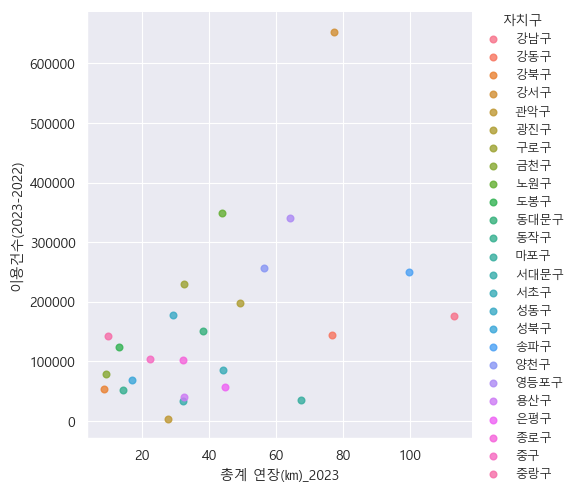

In [ ]:
sns.lmplot(x = '총계 연장(㎞)_2023', y = '이용건수(2023-2022)', data = df_final,
           hue = '자치구')

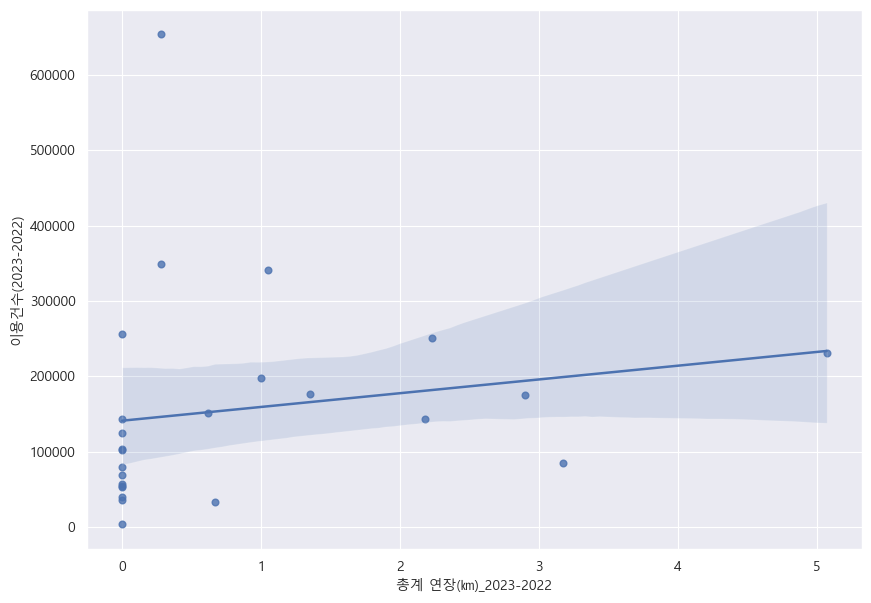

In [ ]:
sns.regplot(x = '총계 연장(㎞)_2023-2022', y = '이용건수(2023-2022)', data = df_final);

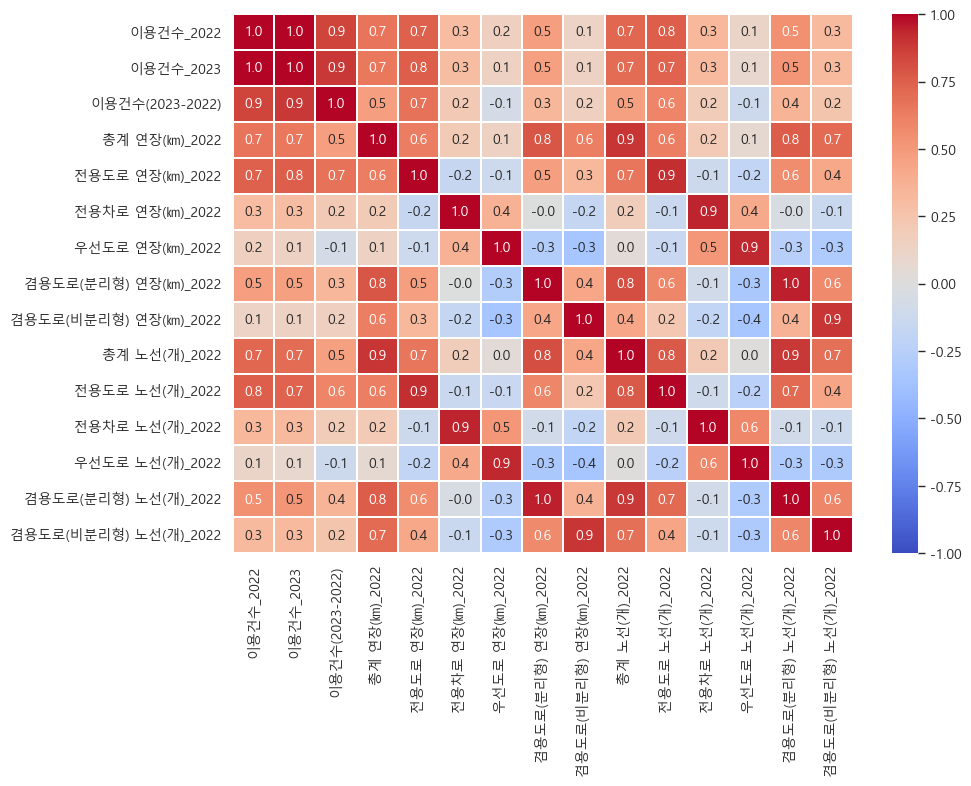

In [ ]:
sns.heatmap(df_final_2022.corr(),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

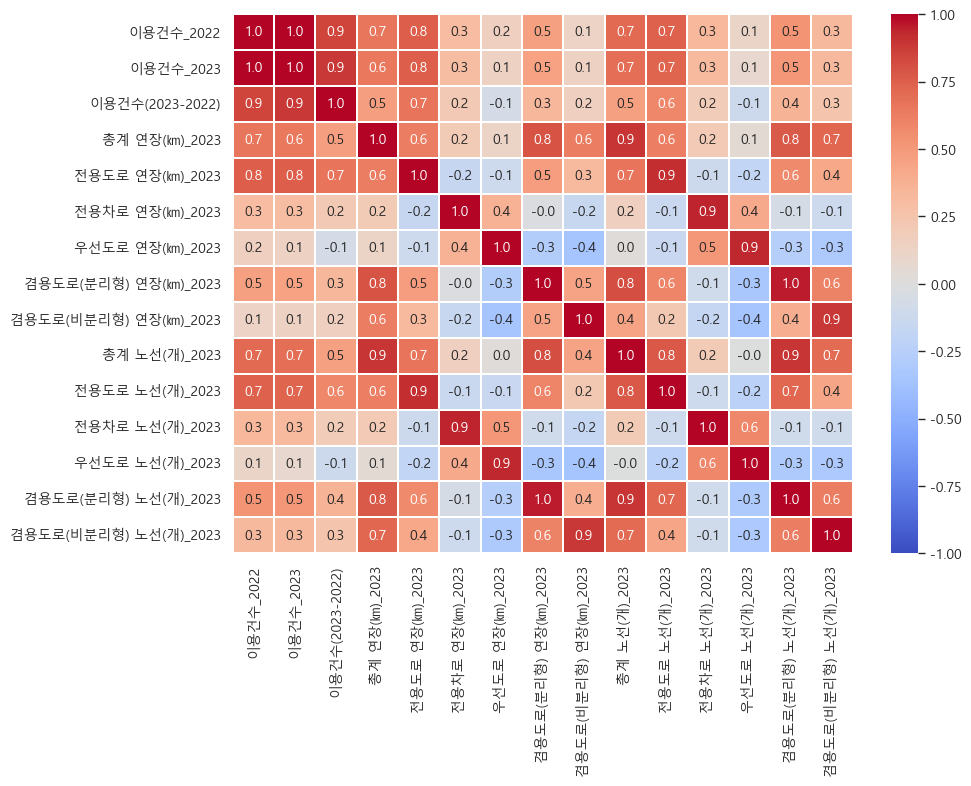

In [ ]:
sns.heatmap(df_final_2023.corr(),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

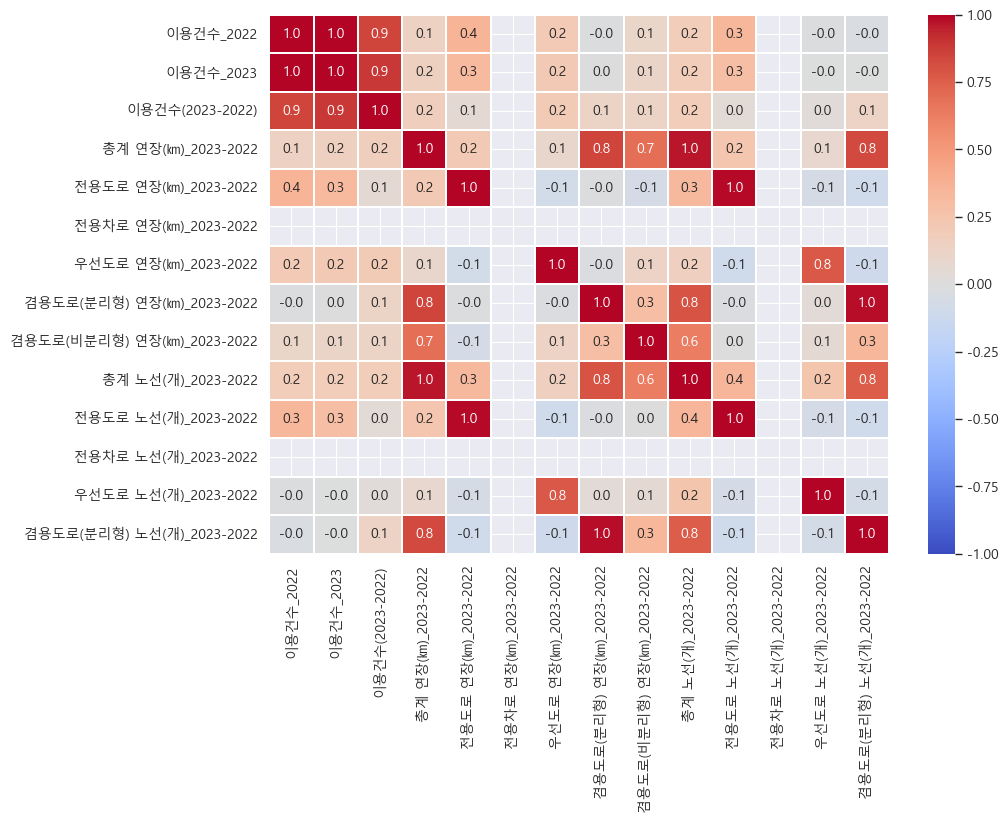

In [ ]:
sns.heatmap(df_final_2023_2022.corr(),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

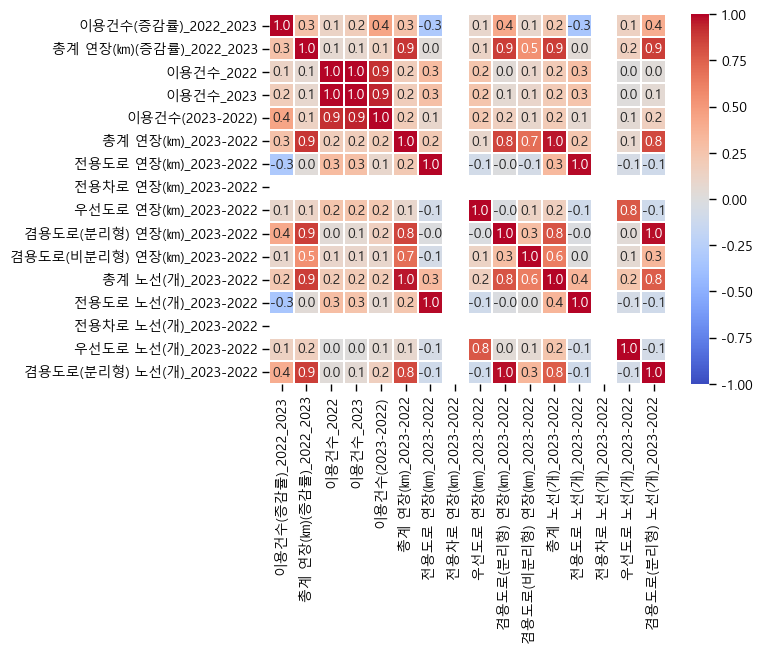

In [136]:
sns.heatmap(df_final_2023_2022_2.corr(),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

In [150]:
df_final_2023_2022_2_1 = df_final_2023_2022_2[df_final_2023_2022_2['총계 연장(㎞)(증감률)_2022_2023'] > 0]

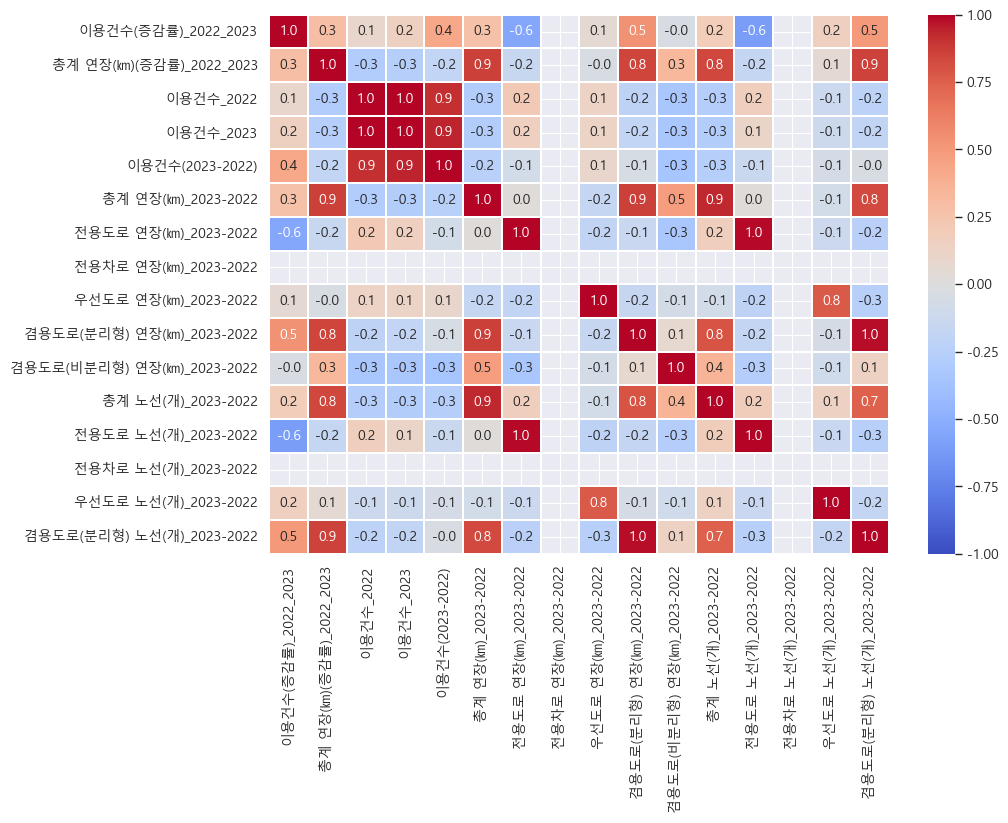

In [160]:
sns.heatmap(df_final_2023_2022_2_1.corr(),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

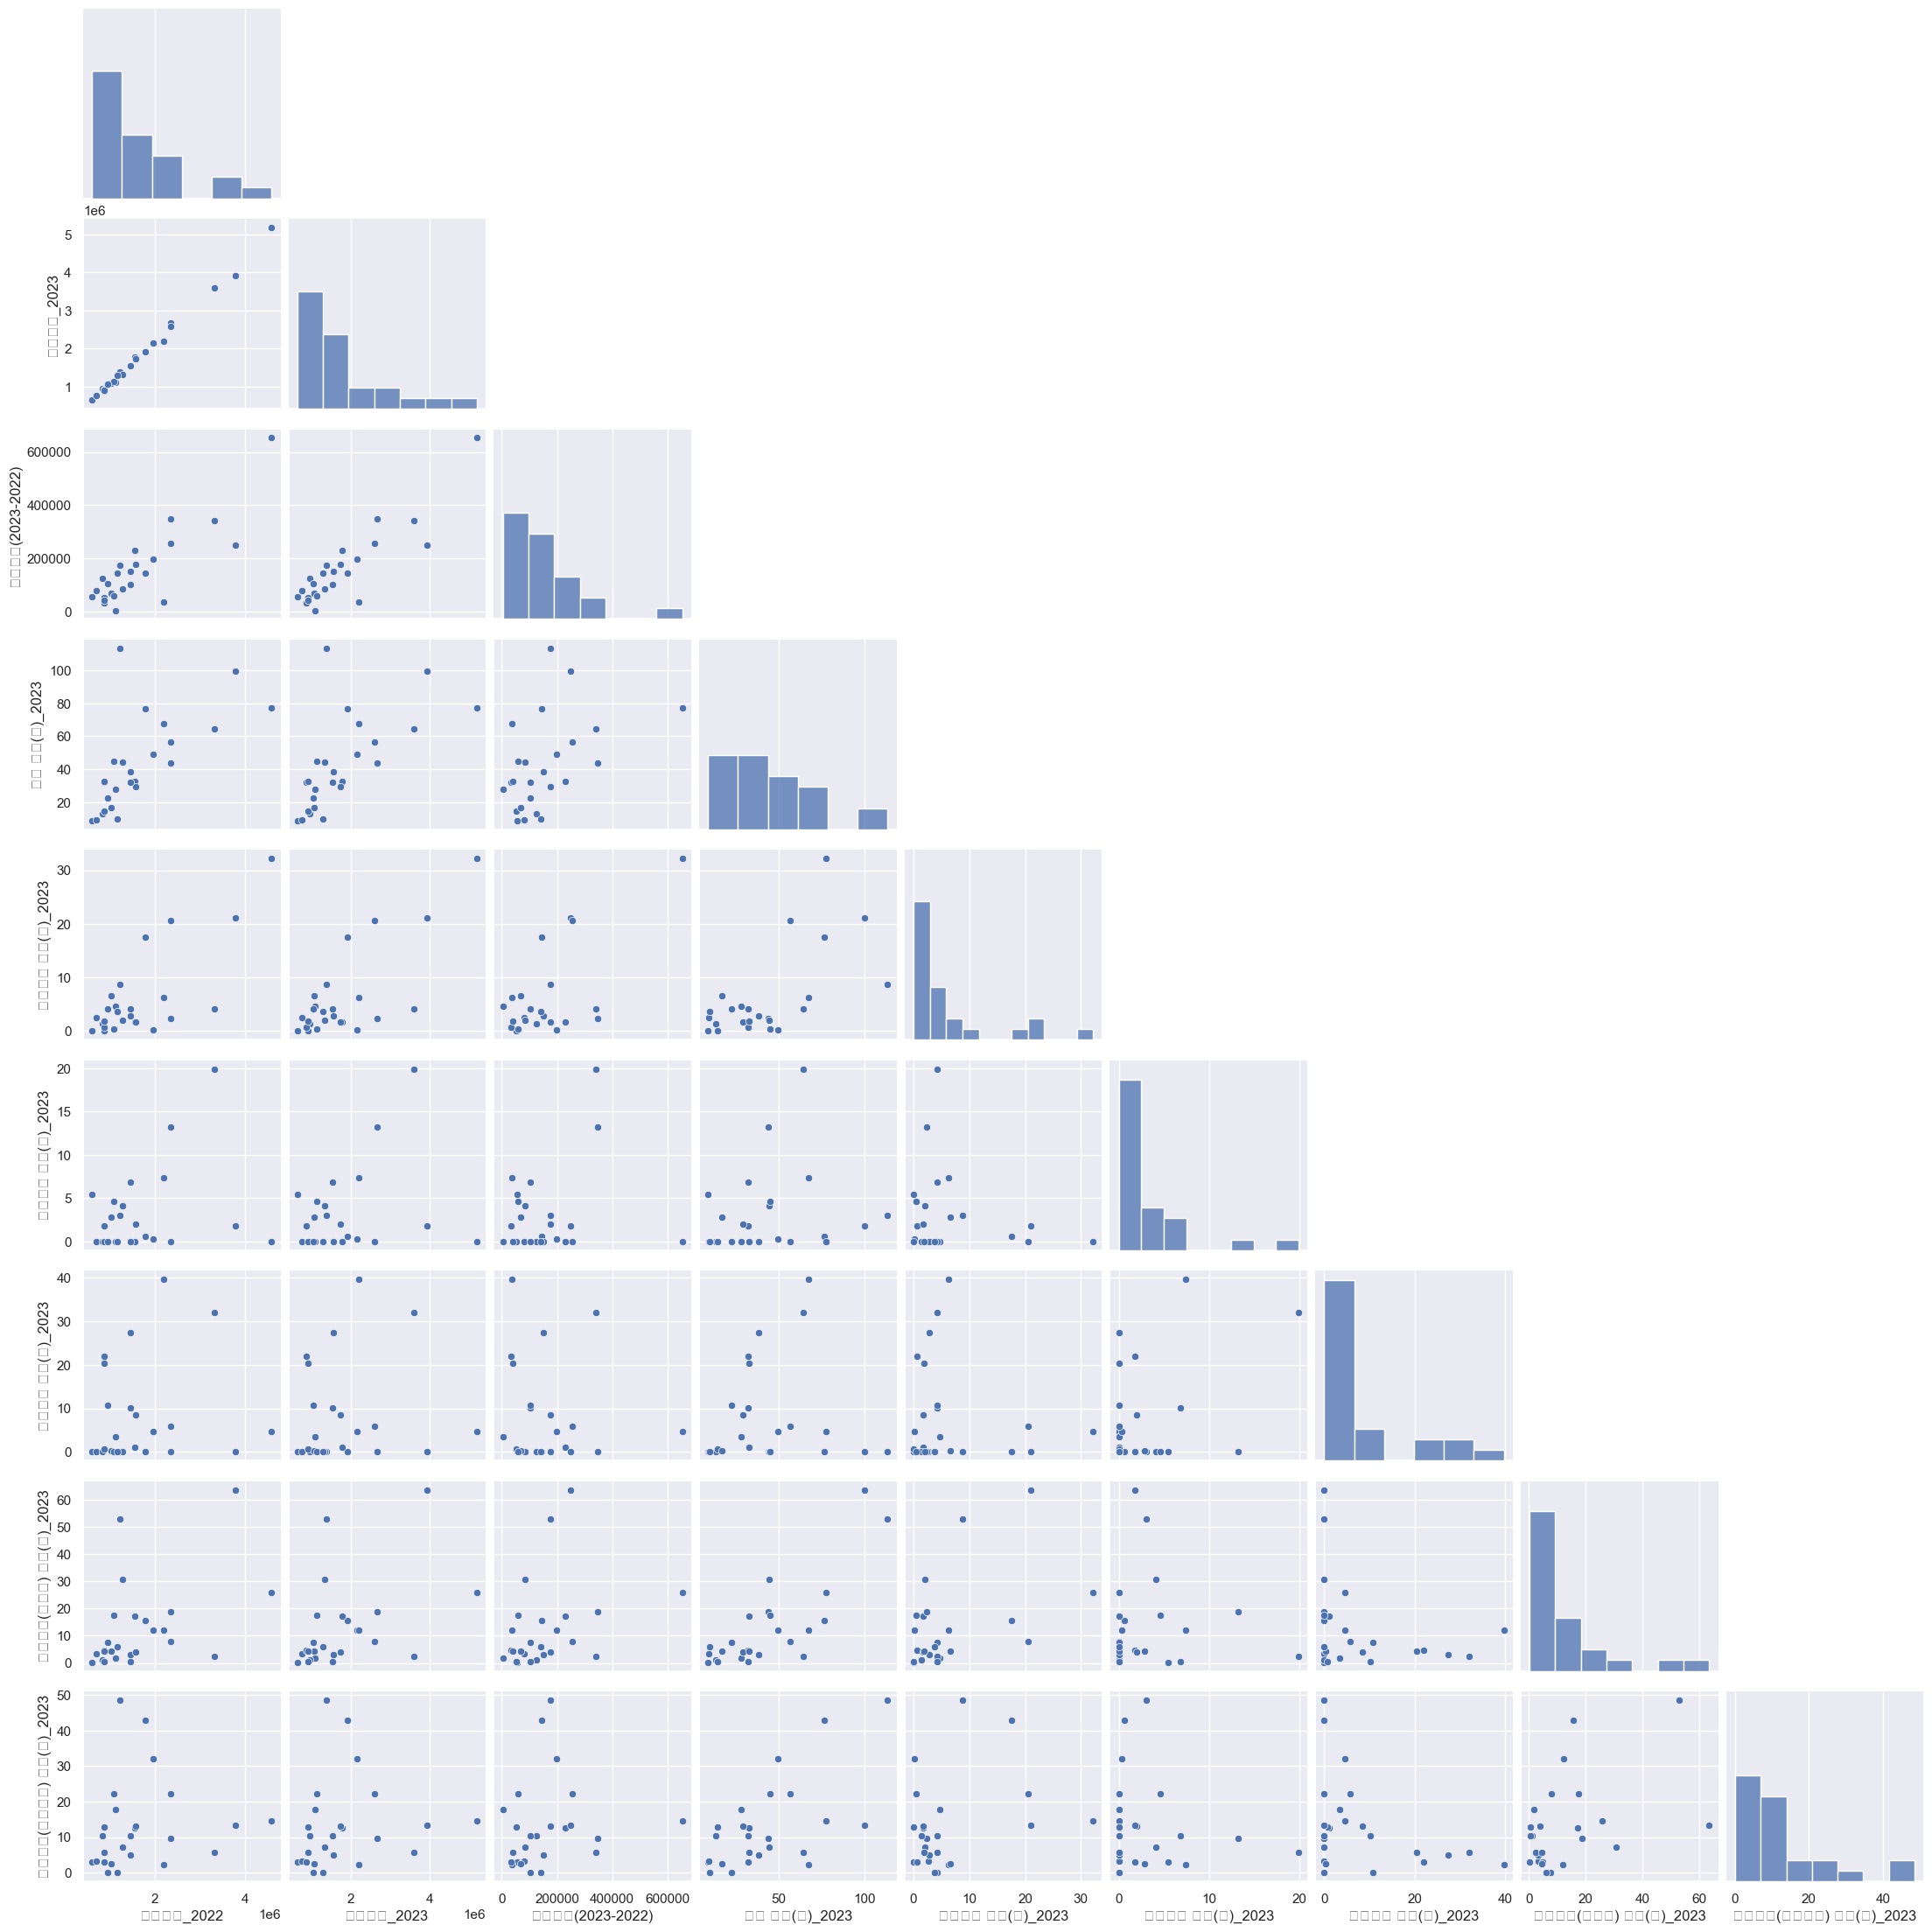

In [ ]:
sns.pairplot(df_final2, corner = True);

In [ ]:
sns.jointplot(data = df_final, x = '총계 연장(㎞)_2023m', y = '이용건수(2023-2022)',
              kind = 'reg',      # 선형회귀선, KDE 밀도곡선 추가
              space = 0,          # x축, y축 공간 0으로 만들기
              #size = 5,           # 크기 조정하기
              ratio = 4           # 비율 조정하기
              )

In [ ]:
df_final.isnull().sum()

자치구                       0
이용건수(2023-2022)           0
총계 연장(㎞)_2023            20
전용도로 연장(㎞)_2023          20
전용차로 연장(㎞)_2023          20
우선도로 연장(㎞)_2023          20
겸용도로(분리형) 연장(㎞)_2023     20
겸용도로(비분리형) 연장(㎞)_2023    20
총계 노선(개)_2023            20
전용도로 노선(개)_2023          20
전용차로 노선(개)_2023          20
우선도로 노선(개)_2023          20
겸용도로(분리형) 노선(개)_2023     20
겸용도로(비분리형) 노선(개)_2023    20
dtype: int64